In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

from tools.curbd import curbd
import numpy as np
import pylab

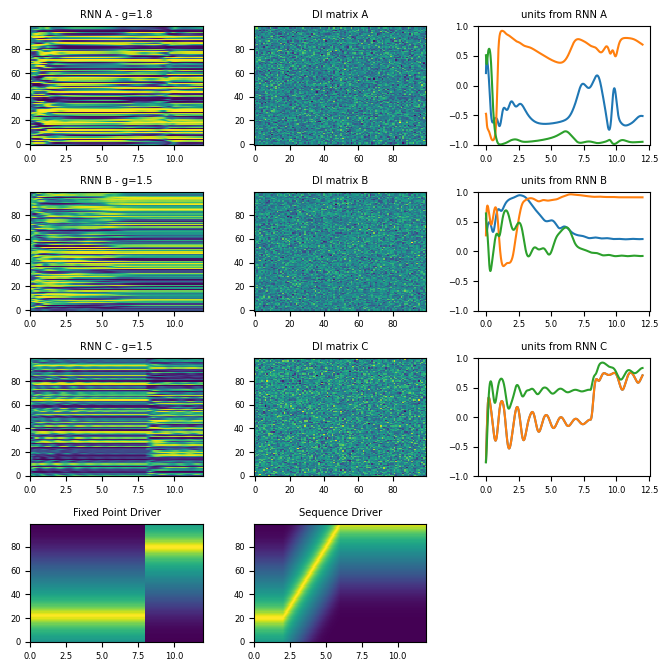

In [2]:
sim = curbd.threeRegionSim(number_units=100)

In [ ]:
sim['Ra'].shape   # N x T

(100, 1201)

In [5]:
# Stack neurons
activity = np.concatenate((sim['Ra'], sim['Rb'], sim['Rc']), 0)  
activity.shape

(300, 1201)

In [ ]:
Na = sim['params']['Na']
Nb = sim['params']['Nb']
Nc = sim['params']['Nc']

regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)


model = curbd.trainMultiRegionRNN(activity,
                                  dtData=sim['params']['dtData'],
                                  dtFactor=5,
                                  regions=regions,
                                  tauRNN=2*sim['params']['tau']/2,
                                  nRunTrain=500,
                                  verbose=True,
                                  nRunFree=5)


[curbd_arr, curbd_labels] = curbd.computeCURBD(model)

In [23]:
n_regions = curbd_arr.shape[0]
n_region_units = curbd_arr[0, 0].shape[0]

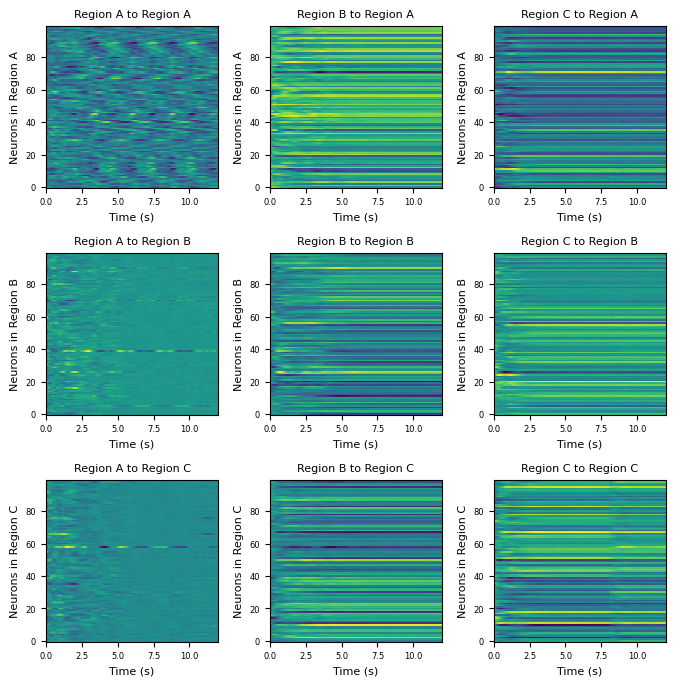

In [28]:
n_regions = curbd_arr.shape[0]
n_region_units = curbd_arr[0, 0].shape[0]

fig = pylab.figure(figsize=[8, 8])
count = 1
for iTarget in range(n_regions):
    for iSource in range(n_regions):
        axn = fig.add_subplot(n_regions, n_regions, count)
        count += 1
        axn.pcolormesh(model['tRNN'], range(n_region_units),
                       curbd_arr[iTarget, iSource])
        axn.set_xlabel('Time (s)')
        axn.set_ylabel('Neurons in {}'.format(regions[iTarget, 0]))
        axn.set_title(curbd_labels[iTarget, iSource])
        axn.title.set_fontsize(8)
        axn.xaxis.label.set_fontsize(8)
        axn.yaxis.label.set_fontsize(8)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.show()

In [34]:
model = curbd.trainMultiRegionRNN(
    activity,
    dtData=sim['params']['dtData'],
    dtFactor=5,
    regions=regions,
    tauRNN=2*sim['params']['tau']/2,
    nRunTrain=500,
    verbose=True,
    nRunFree=5,
    plotStatus=False
)

trial=0 pVar=0.936379 chi2=31.467250
trial=1 pVar=0.977440 chi2=11.548796
trial=2 pVar=0.981201 chi2=9.140881
trial=3 pVar=0.985447 chi2=7.214502
trial=4 pVar=0.987039 chi2=6.397796
trial=5 pVar=0.987826 chi2=5.794728
trial=6 pVar=0.989273 chi2=5.364334
trial=7 pVar=0.989365 chi2=5.145410
trial=8 pVar=0.990597 chi2=4.668828
trial=9 pVar=0.991134 chi2=4.264020
trial=10 pVar=0.991614 chi2=4.051949
trial=11 pVar=0.992269 chi2=3.760355
trial=12 pVar=0.992520 chi2=3.565593
trial=13 pVar=0.992713 chi2=3.406129
trial=14 pVar=0.992888 chi2=3.308791
trial=15 pVar=0.993046 chi2=3.258936
trial=16 pVar=0.993141 chi2=3.230062
trial=17 pVar=0.993229 chi2=3.182966
trial=18 pVar=0.993382 chi2=3.098217
trial=19 pVar=0.993573 chi2=2.996445
trial=20 pVar=0.993748 chi2=2.905097
trial=21 pVar=0.993872 chi2=2.838333
trial=22 pVar=0.993926 chi2=2.800019
trial=23 pVar=0.993909 chi2=2.788770
trial=24 pVar=0.993853 chi2=2.796190
trial=25 pVar=0.993810 chi2=2.808765
trial=26 pVar=0.993781 chi2=2.824588
trial=27 